In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Feature Engineering

In [ ]:
train_filled = pd.read_csv('data/train_filled.csv')
test_filled = pd.read_csv('data/test_filled.csv')

### title

- As we see that these all are the kind of footwear, so we can select the categories from the title for different foot wears

In [ ]:
train_filled['title'].head()

0    Fashionable & Comfortable Bellies For Women  (...
1    Combo Pack of 4 Casual Shoes Sneakers For Men ...
2           Cilia Mode Leo Sneakers For Women  (White)
3                              Men Black Sports Sandal
4                              Men Green Sports Sandal
Name: title, dtype: object

- so the keywords from title can be the name of footwears, hence listing them

In [ ]:
title_list = [ 'sandal', 'sneaker', 'flip flops', 'bellies', 'loafers', 'casuals', 'boots', 'jalsa', 'shoes', 'slip' ]

In [ ]:
def title_cat(title):
    for i in title_list:
        if i in title.lower():
            return i
    return 'Others'

In [ ]:
train_filled['title'] = train_filled['title'].apply(lambda x: title_cat(x))
test_filled['title'] = test_filled['title'].apply(lambda x: title_cat(x))

- Applying OneHot Encoding on the main_category, platform, fulfilled columns, title

In [ ]:
train_filled = pd.get_dummies(train_filled, columns=['main_category','platform','fulfilled','title'],drop_first=True)
test_filled = pd.get_dummies(test_filled, columns=['main_category','platform','fulfilled','title'],drop_first=True)

- Standardizing the columns 'actual_price' , 'norating' , 'noreviews' ,  "one_star" , "two_star" , "three_star" , "four_star" , "five_star"

In [ ]:
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_to_stand = ['actual_price' , 'norating' , 'noreviews' ,  "one_star" , "two_star" , "three_star" , "four_star" , "five_star"]
train_filled[col_to_stand] = scaler.fit_transform(train_filled[col_to_stand])
test_filled[col_to_stand] = scaler.transform(test_filled[col_to_stand])
"""

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\ncol_to_stand = [\'actual_price\' , \'norating\' , \'noreviews\' ,  "one_star" , "two_star" , "three_star" , "four_star" , "five_star"]\ntrain_filled[col_to_stand] = scaler.fit_transform(train_filled[col_to_stand])\ntest_filled[col_to_stand] = scaler.transform(test_filled[col_to_stand])\n'

- Transforming the Numerical columns to make them gaussian distributed

In [ ]:
import scipy.stats as stat


#### Q-Q plot
def plot_data(feature, title=False):
    plt.figure(figsize=(10,6))

    plt.subplot(1,2,1)
    feature.hist()
    plt.title("PDF Plot")
    plt.subplot(1,2,2)
    stat.probplot(feature,dist='norm',plot=plt)
    plt.title("Q-Q Plot")
    if title:
        plt.suptitle(title)

    plt.show()


### actual_price

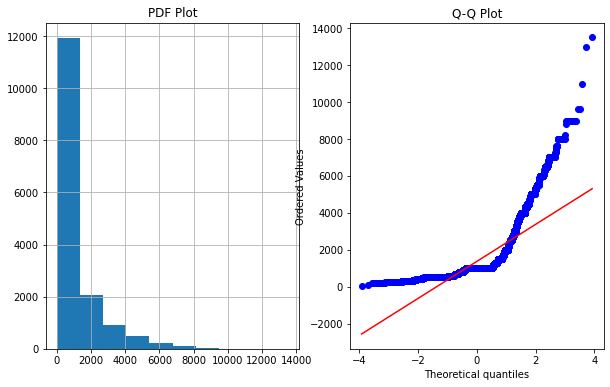

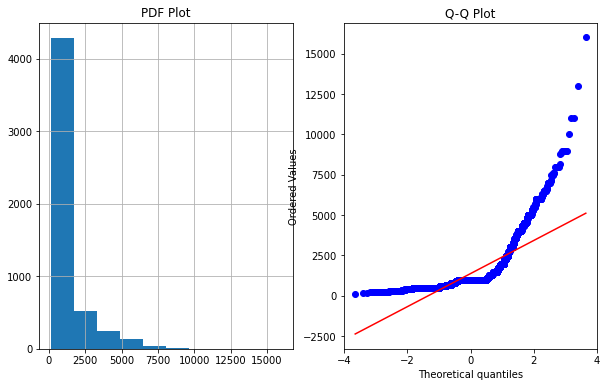

In [ ]:
plot_data(train_filled['actual_price'])
plot_data(test_filled['actual_price'])

- As this is left skewed, we are going to apply log transformation on this column

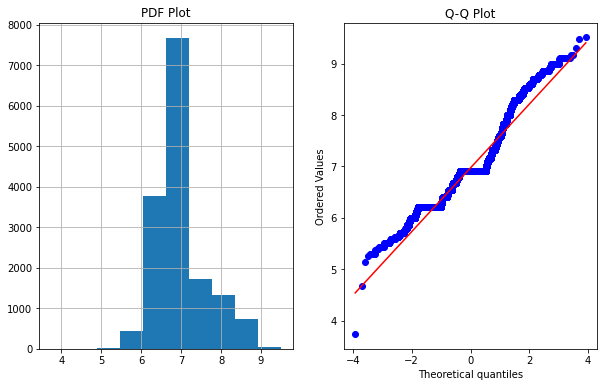

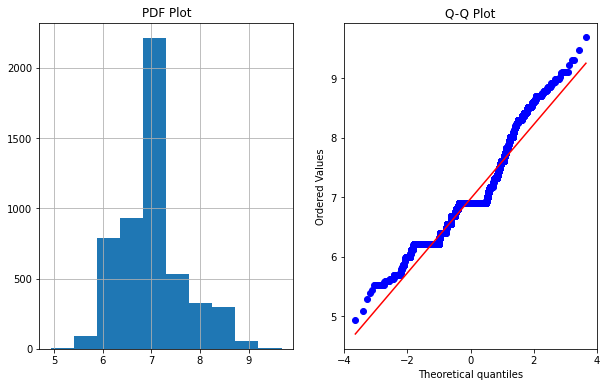

In [ ]:
plot_data(np.log(train_filled['actual_price']))
plot_data(np.log(test_filled['actual_price']))

- This is giving an better gaussian transformation hence applying log transformation on this column on both test and train data

In [ ]:
train_filled['actual_price'] = np.log(train_filled['actual_price'])
test_filled['actual_price'] = np.log(test_filled['actual_price'])

### norating

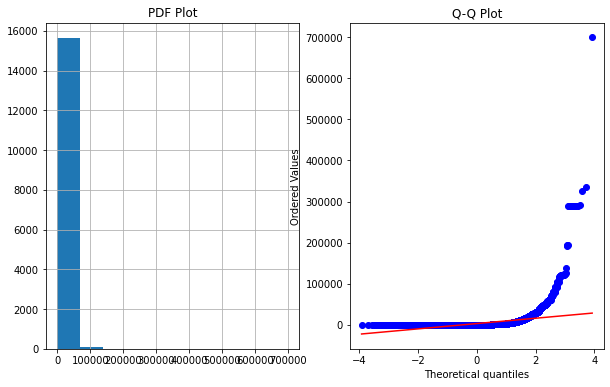

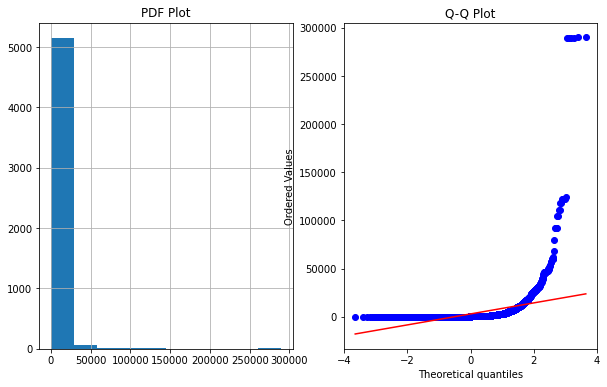

In [ ]:
plot_data(train_filled['norating'])
plot_data(test_filled['norating'])

- As this looks very weird, we are going to apply box-cox transformation on this column

-0.02432447073040315


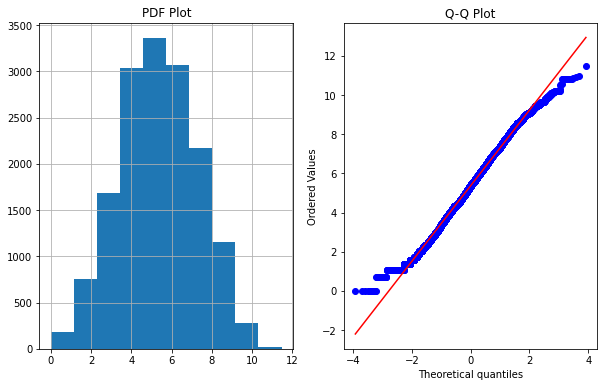

In [ ]:
temporary = pd.DataFrame()
temporary['temp_col_train'],parameters=stat.boxcox(train_filled['norating']+0.0001)
print(parameters)
plot_data(temporary['temp_col_train'])
del(temporary)

- trying to see the nature of test cure with the box-cox parameter of train data, i.e -0.02432447073040315

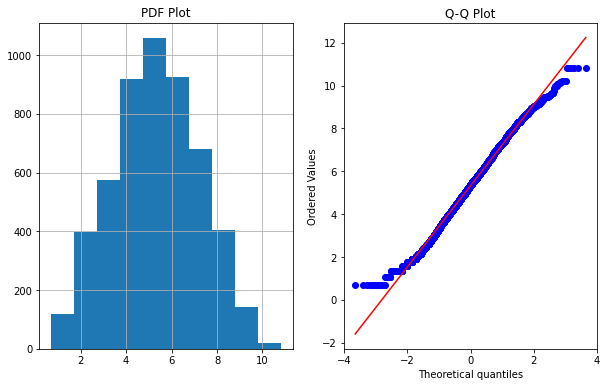

In [ ]:
temporary = pd.DataFrame() 
temporary['temp_col_train'] = pd.DataFrame(([ ( test_filled['norating'] + 1 )**parameters - 1]/parameters).transpose())
plot_data(temporary['temp_col_train'])
del(temporary)

- As both test and training data looks well, hence we are going to apply box-cox transformation on this column

In [ ]:
train_filled['norating'] = pd.DataFrame(([ ( train_filled['norating'] + 1 )**parameters - 1]/parameters).transpose())
test_filled['norating'] = pd.DataFrame(([ ( test_filled['norating'] + 1 )**parameters - 1]/parameters).transpose())

### noreviews

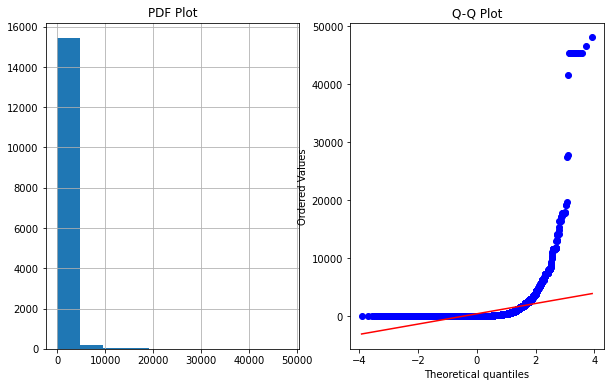

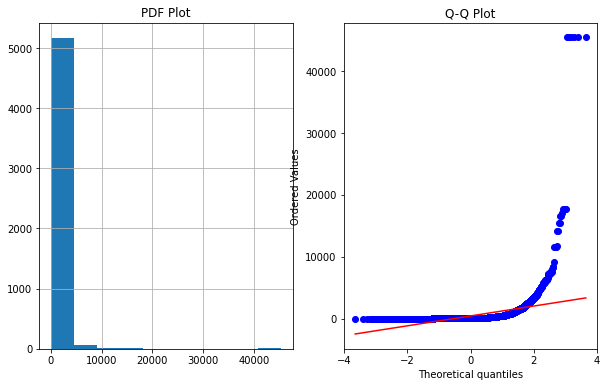

In [ ]:
plot_data(train_filled['noreviews'])
plot_data(test_filled['noreviews'])

- same as norating try to find the best box-cox parameter

0.11480431024484074


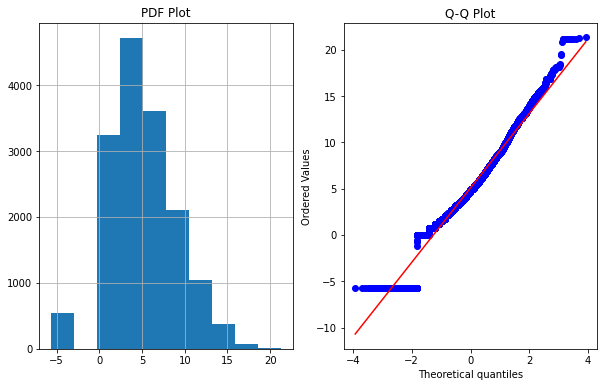

In [ ]:
temporary = pd.DataFrame()
temporary['temp_col_train'],parameters=stat.boxcox(train_filled['noreviews']+0.0001)
print(parameters)
plot_data(temporary['temp_col_train'])
del(temporary)

- trying to see the nature of test cure with the box-cox parameter of train data, i.e 0.11480431024484074

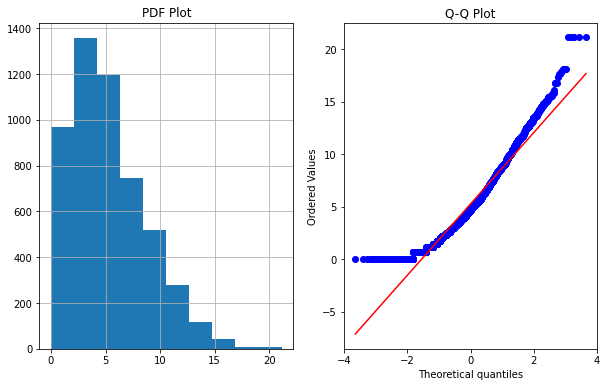

In [ ]:
temporary = pd.DataFrame() 
temporary['temp_col_train'] = pd.DataFrame(([ ( test_filled['noreviews'] + 1 )**parameters - 1]/parameters).transpose())
plot_data(temporary['temp_col_train'])
del(temporary)

- these are much better than that of original data, hence we are going to apply box-cox transformation on this column

In [ ]:
train_filled['noreviews'] = pd.DataFrame(([ ( train_filled['noreviews'] + 1 )**parameters - 1]/parameters).transpose())
test_filled['noreviews'] = pd.DataFrame(([ ( test_filled['noreviews'] + 1 )**parameters - 1]/parameters).transpose())

### stars

- Try log transformation on this column

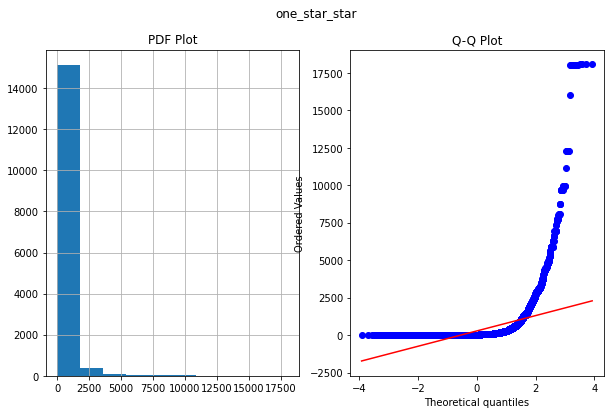

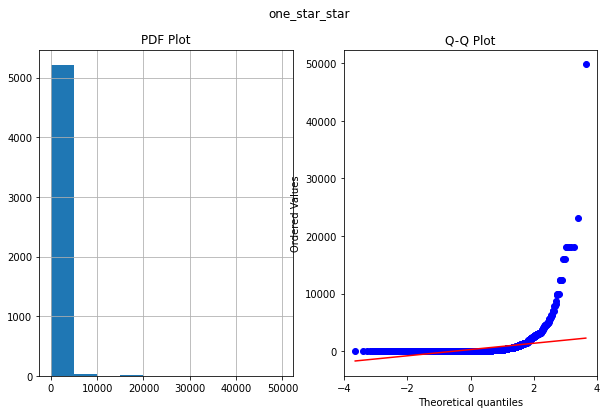

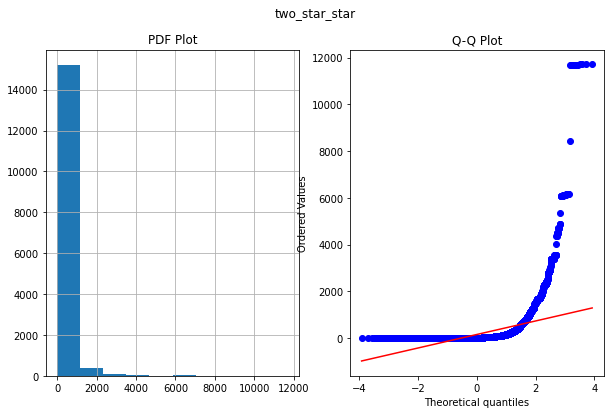

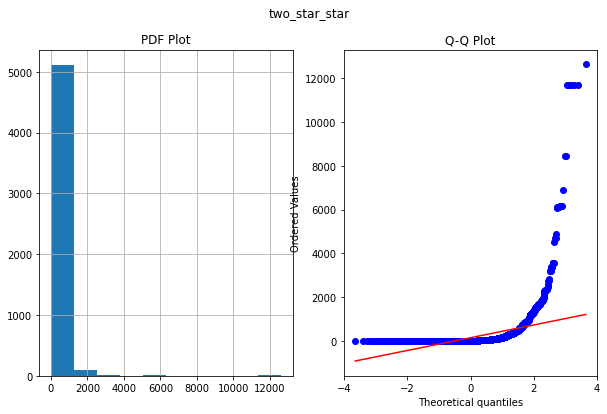

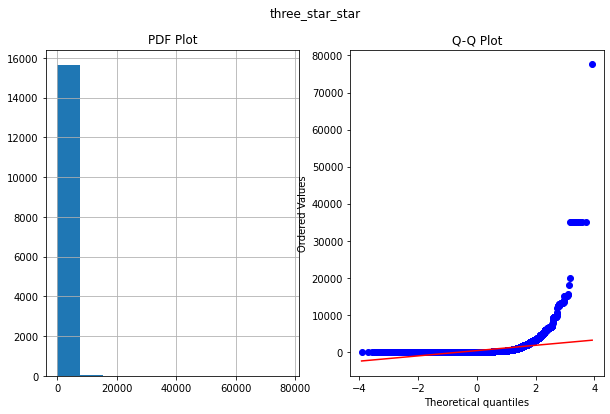

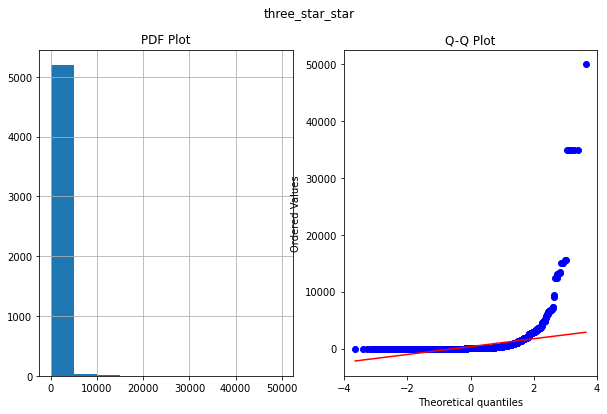

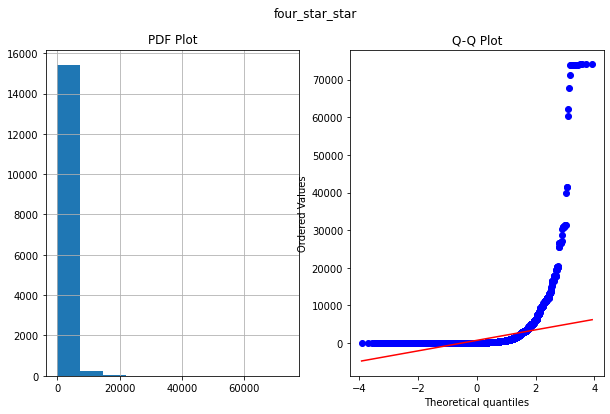

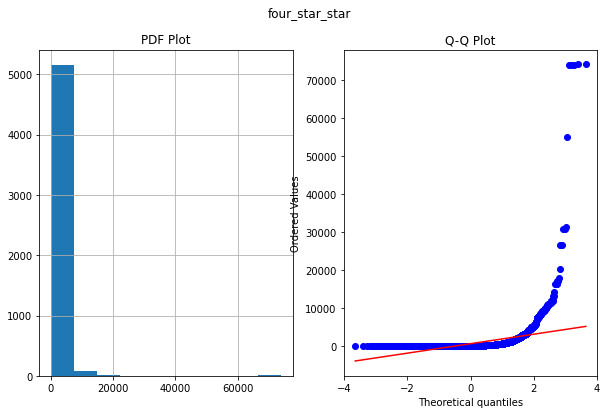

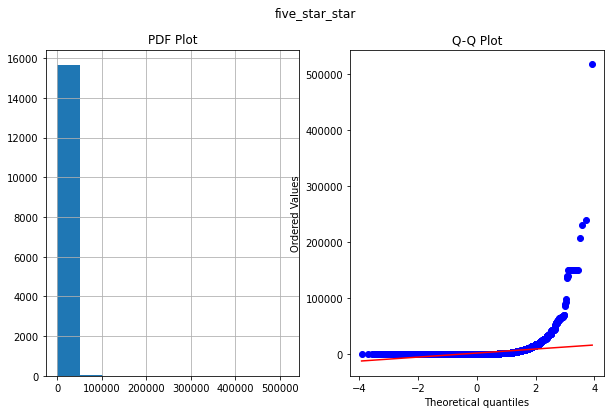

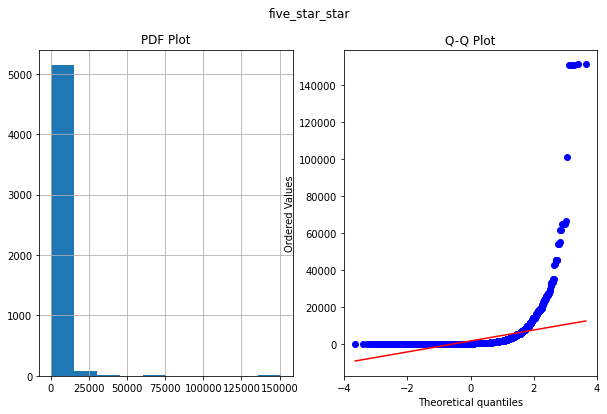

In [ ]:
for i in ['one_star','two_star','three_star','four_star','five_star']:
    plot_data(train_filled[i],title=(i+"_star"))
    plot_data(test_filled[i],title=(i+"_star"))

- let's try log transformation

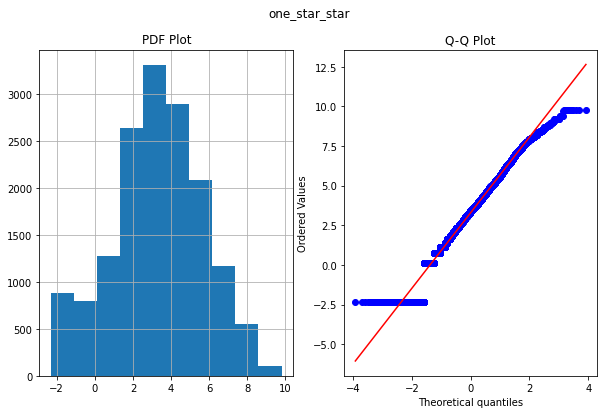

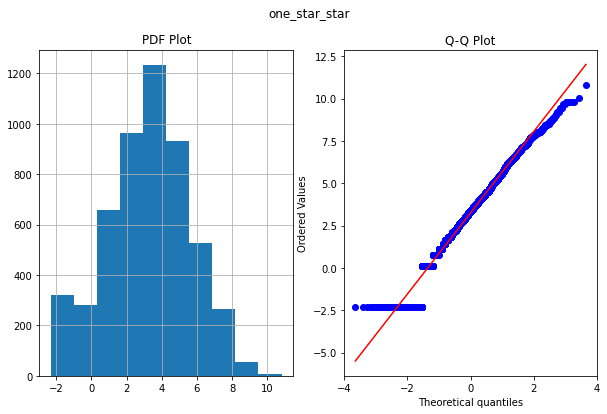

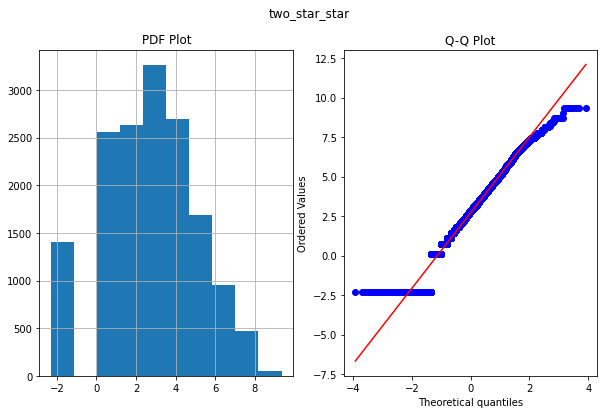

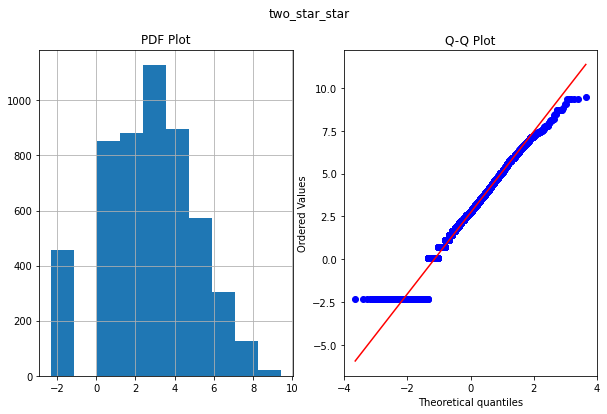

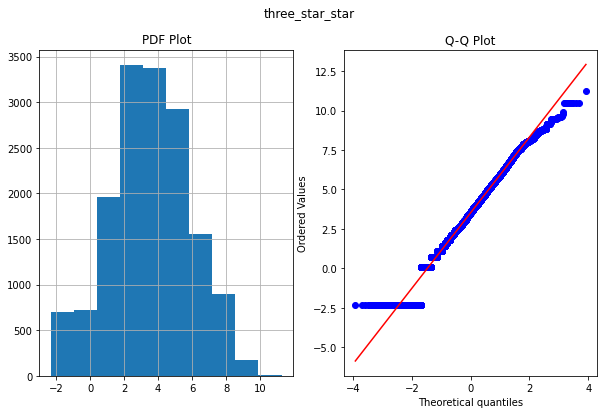

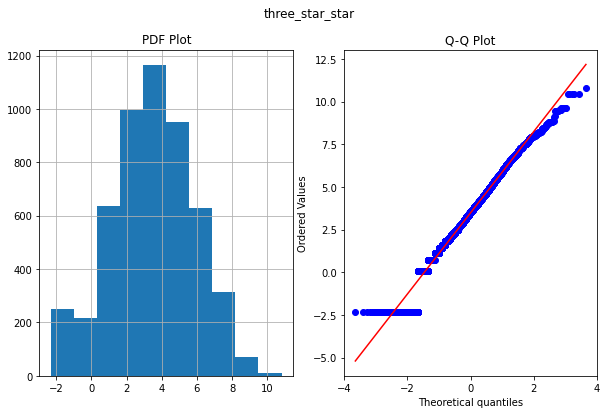

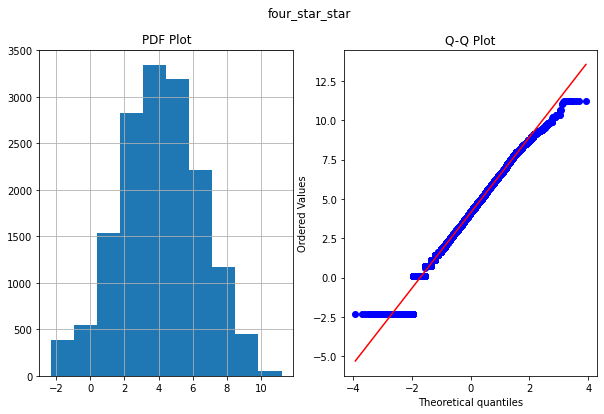

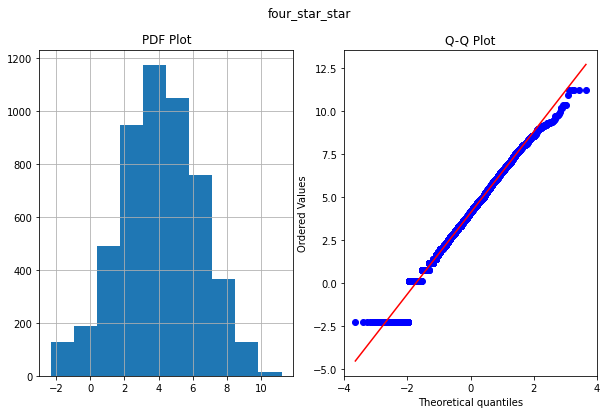

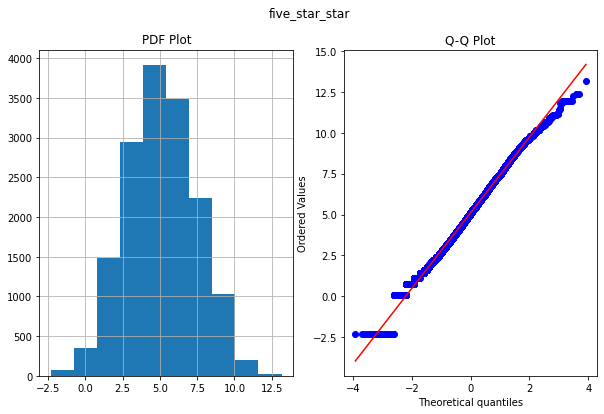

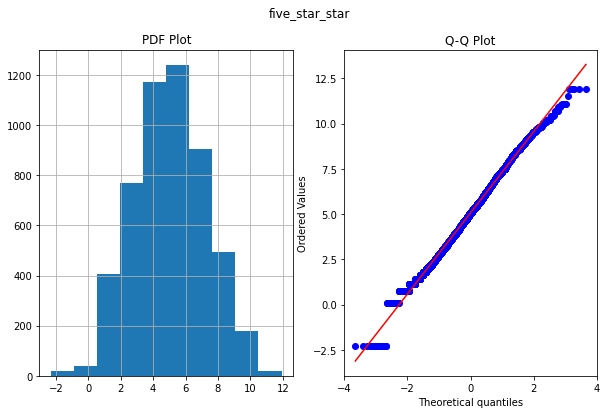

In [ ]:
for i in ['one_star','two_star','three_star','four_star','five_star']:
    plot_data(np.log(train_filled[i]+0.1),title=(i+"_star"))
    plot_data(np.log(test_filled[i]+0.1),title=(i+"_star"))

- Not the best but still seems better

In [ ]:
for i in ['one_star','two_star','three_star','four_star','five_star']:
    train_filled[i] = np.log(train_filled[i]+0.1)
    test_filled[i] = np.log(test_filled[i]+0.1)

- Now at last dropping the id from the train_set as that is of no use

In [ ]:
train_filled = train_filled.drop(columns=['id'],axis=1)

In [ ]:
train_filled.to_csv('data/train_filled_scaled.csv', index=False)
test_filled.to_csv('data/test_filled_scaled.csv', index=False)